The problem statement for the assignement is that we have to use svm and strocasticgradientdecisent for the given dataset of adults income with other features.
Team members are:- ENG20AM0010 Anirudh Narayanan,
                   Arham Asif Syed ENG20AM0013,
                   Chandrashekar N ENG20AM0018 and
                   Viswamber Prasad ENG20AM0060
Gaurav helped in the assignement for the main svm class
So the main thing is that we have to find plots for both normalized data and non normalized data for the same dataset, so here we want to find out how people earn less than $ 50,000 
and 
greater than 
$ 50,000 based on some feature's 
Standardizing Salary Column since it is in the format of strings
If Salary == ' <50k' == -1
Else Salary == ' >50k' == 1

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

Here we are reading the data and removing all the header in the file.

In [18]:
df = pd.read_csv('adult.data')
# Removing all Columns without a continuous Attributes
PopColumns = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'nativecountry']
for i in PopColumns:
    df.pop(i)
pass
npSalary = np.zeros((df.shape[0],1))
for i in range(df.shape[0]):
    npSalary[i][0] = -1 if df.iloc[i][6] == ' <=50K' else 1

Here this the normalization function for the dataset we will use standard deviation and mean values for each colums to normalized. 

In [19]:
#Normalizing Data in Mean and Unit Variance
def normalization(df):
    Np_Norm = np.zeros((df.shape[0],df.columns.size))
    for i in range(df.columns.size-1):
        mean_ = df.iloc[:,i].mean()
        std_ = df.iloc[:,i].std()
        for j in range(df.shape[0]):
            Np_Norm[j][i] = (df.iloc[j][i]-mean_)/std_
    return Np_Norm
Np_Norm = normalization(df)

Here we are making converting the given normalized data into datafram in pandas and we are using empty list of accuracy to store accuracy result for each epochs.

In [20]:
df_norm = pd.DataFrame(Np_Norm)
df_norm.header = False
df_norm[6] = npSalary
AccuracyList = []

In [21]:
y = df_norm.pop(6)
X = df_norm

Here RegStrength is given the question where we will change the values based on this list {10−3, 10−2, 10−1, 1}. Next is fun for sgd and train test split 

In [22]:
X_train, X_test_val, y_train, y_test_val = train_test_split( X, y, test_size=0.20, random_state=57)
X_test, X_val, y_test, y_val = train_test_split( X_test_val, y_test_val, test_size=0.50, random_state=57)

In [34]:
accuracyList = []

In [35]:
class SVM:
    def __init__(self, learningRate=0.1, regStrength=1e-3):
        self.regStrength=regStrength
        self.learningRate=learningRate

    def computeCost(self, W, X, Y):
        # calculate hinge loss
        M = X.shape[0]
        Y = np.array(Y)
        distances = 1 - Y.reshape(1, -1) * (np.dot(X, W))
        distances[distances < 0] = 0 
        hinge_loss = self.regStrength * (np.sum(distances) / M)

        cost = 1 / 2 * np.dot(np.transpose(W), W) + hinge_loss
        return cost
    
    def calcCostGradient(self, W, X_batch, Y_batch):

        Y_final= Y_batch.astype(np.float64)
        X_final = X_batch
        W_64 = W.astype(np.float64)
        distance = 1 - (Y_final * np.dot(X_final, W_64))
        dw = np.zeros(len(W_64))
        dw = dw.reshape(-1, 1)
        if all(item < 0 for item in distance):
            di = W_64
        else:
            x_test = W_64 - ((self.regStrength * Y_final) * X_final.reshape(-1, 1))
            di = x_test
        dw += di
        return dw
    
    def testAccuracy(self, X_test, weights):
        y_test_predicted = np.ndarray(shape=(len(X_test), 1))
        for i in range(X_test.shape[0]):
            yp = np.sign(np.dot(np.transpose(weights), X_test.to_numpy()[i])) #model
            y_test_predicted[i] = yp
        return y_test_predicted

    def validation(self, X_validate,weights, Y_validate):
        finalWeights = list(weights)
        results = self.testAccuracy(X_validate, finalWeights)
        a = accuracy_score(Y_validate, results)
        return (a / len(X_validate)) * 100

    def sgd(self, features, outputs, maxEpochs):
        weights = np.zeros(features.shape[1])
        weights = weights.reshape(-1, 1)
        epochs = 0
        previousCost = float("inf")
        costTreshold = 0.01  
        for epoch in range(1, maxEpochs):
            print(f"{epoch,}", end = " ")
            X, Y = shuffle(features, outputs)
            for i in range(0,len(X),300):
                if (i % 30 == 0):
                    validate = self.validation(features, weights, outputs)
                    accuracyList.append(validate)
                    try:
                        ascent = self.calcCostGradient(weights, np.array(X.iloc[[i]]), Y[i])
                        weights -= (self.learningRate * ascent)
                    except:
                        continue

            if epoch == maxEpochs-1:
                cost = self.computeCost(weights, features, outputs)
                print(f"Epoch is:{epoch} and Cost is: {cost}")

                if abs(previousCost - cost) < costTreshold * previousCost:
                    return weights
                previousCost = cost
                epochs += 1
        return weights
           
    def test(self, X_test, weights):
        y_test_predicted = np.ndarray(shape=(len(X_test), 1))
        for i in range(X_test.shape[0]):
            yp = np.sign(np.dot(np.transpose(weights), X_test.to_numpy()[i])) #model
            y_test_predicted[i] = yp
        return y_test_predicted

In [36]:
model = SVM()

In [37]:
weight = model.sgd(X_train, y_train, 100)

(1,) (2,) (3,) (4,) (5,) (6,) (7,) (8,) (9,) (10,) (11,) (12,) (13,) (14,) (15,) (16,) (17,) (18,) (19,) (20,) (21,) (22,) (23,) (24,) (25,) (26,) (27,) (28,) (29,) (30,) (31,) (32,) (33,) (34,) (35,) (36,) (37,) (38,) (39,) (40,) (41,) (42,) (43,) (44,) (45,) (46,) (47,) (48,) (49,) (50,) (51,) (52,) (53,) (54,) (55,) (56,) (57,) (58,) (59,) (60,) (61,) (62,) (63,) (64,) (65,) (66,) (67,) (68,) (69,) (70,) (71,) (72,) (73,) (74,) (75,) (76,) (77,) (78,) (79,) (80,) (81,) (82,) (83,) (84,) (85,) (86,) (87,) (88,) (89,) (90,) (91,) (92,) (93,) (94,) (95,) (96,) (97,) (98,) (99,) Epoch is:99 and Cost is: [[26.04800691]]


In [38]:
from matplotlib import pyplot as plt

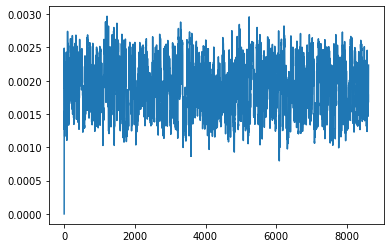

In [39]:
plt.plot(accuracyList)